In [3]:
import torch
import matplotlib.pyplot as plt

from datamodule import RGBDDataModule

DATASET_DIR = "D:/Documents_D/processed_data"


datamodule = RGBDDataModule(
    dataset_dir=DATASET_DIR,
    batch_size=1,
    num_workers=0,
    pin_memory=False,
    img_size=480 
)

datamodule.setup()

loader = datamodule.train_dataloader()

def show_rgb_depth_pairs(dataloader, num_pairs=5):
    plt.figure(figsize=(10, 4 * num_pairs))
    
    for i, (rgb, depth) in enumerate(dataloader):
        if i >= num_pairs:
            break

        rgb_img = rgb[0].squeeze().detach().cpu().numpy()  
        depth_img = depth[0].squeeze().detach().cpu().numpy()  

        plt.subplot(num_pairs, 2, 2*i + 1)
        plt.imshow(rgb_img, cmap='gray')
        plt.title(f"RGB (Grayscale) - Pair {i}")
        plt.axis("off")

        plt.subplot(num_pairs, 2, 2*i + 2)
        plt.imshow(depth_img, cmap='gray')
        plt.title(f"Depth - Pair {i}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

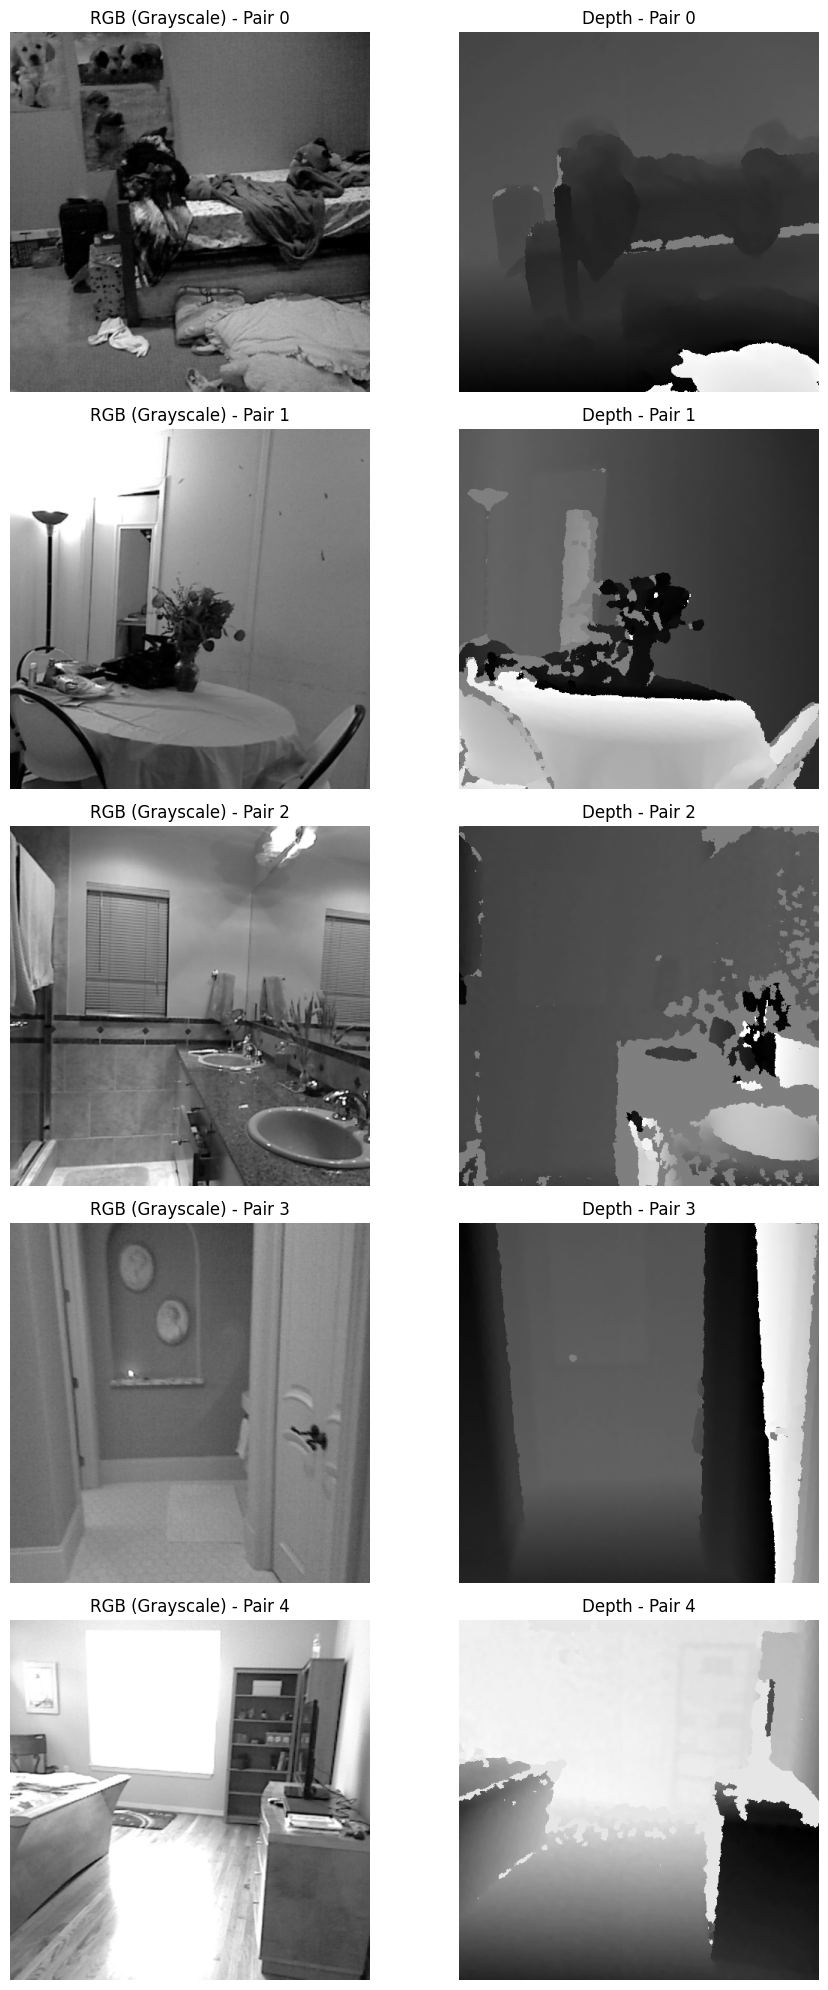

In [2]:
show_rgb_depth_pairs(loader, num_pairs=5)